# To Explore Unsupervised Machne Learning: K Means Clustering

# Problem Statement

The goal is to predict optimum numbaer of clusters and represent it visually

# Importing the required libraries and data set

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\abc\\Downloads'

In [5]:
data=pd.read_csv("Iris.csv")
print('Data imported succefully')
data.head(5)

Data imported succefully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [6]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [7]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [9]:
print(data.dtypes) 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


Description: All the variables are of Numeric type except Species

In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Description: There is no missing value in the dataset.

In [11]:
data.shape

(150, 6)

Description: There are 150 observations (rows) and 6 variables(column)

In [12]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
data.groupby('Species').sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1275,250.3,170.9,73.2,12.2
Iris-versicolor,3775,296.8,138.5,213.0,66.3
Iris-virginica,6275,329.4,148.7,277.6,101.3


In [14]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

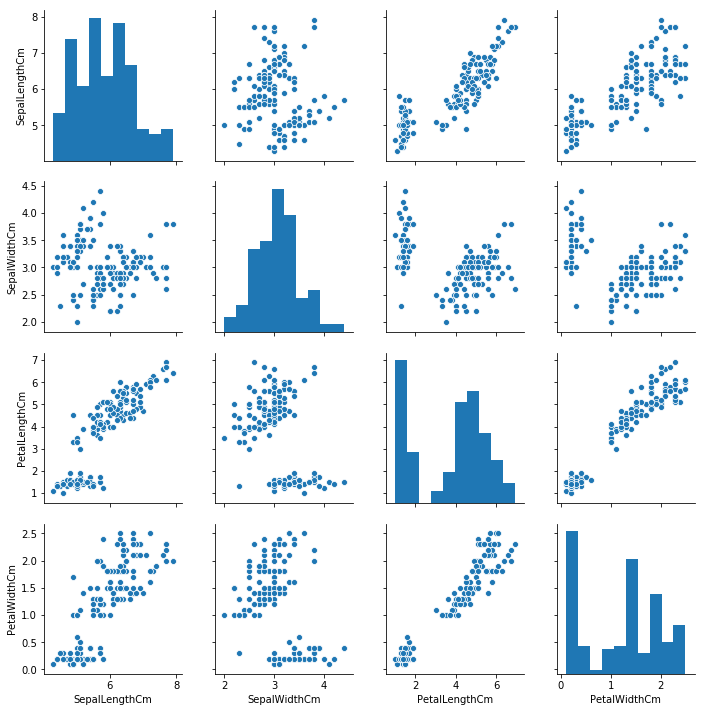

In [15]:
sns.pairplot(data.drop('Id',axis=1))

Text(0.5, 1.0, 'Cluster')

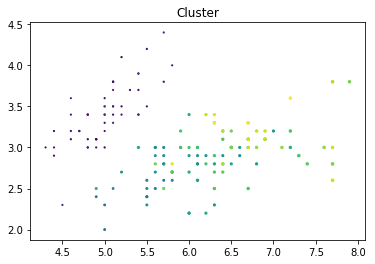

In [16]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'])
plt.title('Cluster')

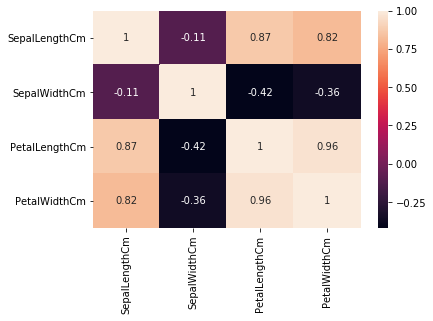

In [17]:
new_data= data.drop('Id',axis=1)
sns.heatmap(new_data.corr(), annot=True)

# Preparing the Algorithm

In [18]:
X = data.iloc[:, [1, 2, 3, 4]].values

In [19]:
from sklearn.cluster import KMeans
wsse = [] #creating empty list # wsse==>within cluster SSE 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(X)                                      
    wsse.append(kmeans.inertia_)
wsse

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.95701115711985,
 34.19068792479662,
 30.274954264002254,
 28.110896270396275,
 26.523114676173506]

# Elbow Curve - Helps to determining the number of Clusters

Using the elbow method to find the optimal number of clusters

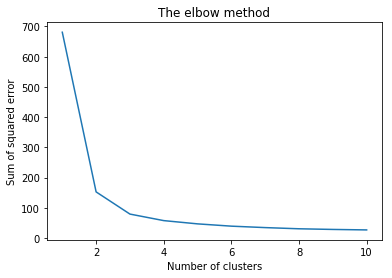

In [20]:
 plt.plot(range(1, 11), wsse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.show()

From the above graph, we see that elbow shape appears at 3.
Hence, the optimum no. of Clusters is '3'

# Predicting

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
Y_pred = kmeans.fit_predict(X)

In [22]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Cluster Centers

In [23]:
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids)

Centroid values
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


# Total Observation in 3 Clusters

In [24]:
data["Cluster"]=Y_pred
pd.value_counts(data["Cluster"])

0    62
1    50
2    38
Name: Cluster, dtype: int64

# Visualization of clusters

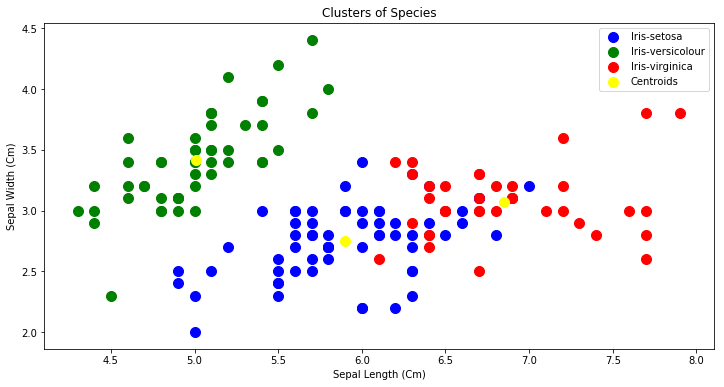

In [28]:
plt.figure(figsize =(12,6))
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')


plt.title('Clusters of Species')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.legend()
plt.show()

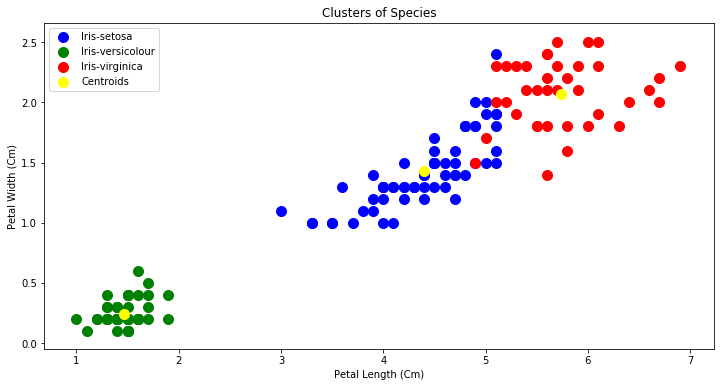

In [29]:
plt.figure(figsize =(12,6))
plt.scatter(X[Y_pred == 0, 2], X[Y_pred == 0, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 1, 2], X[Y_pred == 1, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 2, 2], X[Y_pred == 2, 3], s = 100, c = 'red', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Species')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.legend()
plt.show()